<a href="https://colab.research.google.com/github/grommy/NLP_in_TensorFlow/blob/master/week_3/classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
training_size=160000
test_portion=.1




In [3]:

# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

--2019-07-23 06:41:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M  77.7MB/s    in 2.9s    

2019-07-23 06:41:43 (77.7 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [0]:


num_sentences = 0
corpus = []
labels = []

with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
        label = 0 if row[0]=="0" else 1
        labels.append(label)
#         if label !=0:
#           print(row, label)
#           break
        
        list_item=[row[5], label]
        # YOUR CODE HERE
        num_sentences = num_sentences + 1
        corpus.append(list_item)



In [5]:
np.unique(labels)

array([0, 1])

In [6]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [0]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



In [8]:
import collections
collections.Counter(labels)

Counter({0: 80049, 1: 79951})

In [9]:
split = int(test_portion * training_size)
print(split)

test_sequences = padded[-split:]
training_sequences = padded[:-split]
test_labels = labels[-split:]
training_labels = labels[:-split]

16000


In [10]:
collections.Counter(training_labels)

Counter({0: 72081, 1: 71919})

In [11]:
print(training_sequences.shape)
print(len(training_labels))

(144000, 16)
144000


In [12]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

138352
1


In [13]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

--2019-07-23 06:42:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  74.3MB/s    in 4.5s    

2019-07-23 06:42:06 (74.3 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [0]:

embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [15]:
print(len(embeddings_matrix))
# Expected Output
# 138859

138353


In [32]:
# # Convolution layers

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
#     # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
#     tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
# #     tf.keras.layers.MaxPool1D(2),
#     tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
    
# ])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

# # val_acc ~ 0.75


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 16, 100)           13835300  
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 12, 128)           64128     
_________________________________________________________________
dropout (Dropout)            (None, 12, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            24640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 16, 100)           13835300  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 16, 40)            19360     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 40)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 10)                1840      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [0]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(64, 5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=4),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()

# num_epochs = 50
# history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

# print("Training Complete")

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_acc', patience=10)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, 
                             monitor='val_acc', load_weights_on_restart=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
history = History()

In [40]:
num_epochs = 50
model.fit(training_sequences, training_labels, epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), verbose=2,
                   callbacks=[early_stopping, checkpoint, history, reduce_lr])

print("Training Complete")

Train on 144000 samples, validate on 16000 samples
Epoch 1/50
144000/144000 - 668s - loss: 0.5536 - acc: 0.7161 - val_loss: 0.5154 - val_acc: 0.7443
Epoch 2/50
144000/144000 - 656s - loss: 0.5049 - acc: 0.7521 - val_loss: 0.4935 - val_acc: 0.7601
Epoch 3/50
144000/144000 - 659s - loss: 0.4881 - acc: 0.7640 - val_loss: 0.4945 - val_acc: 0.7568
Epoch 4/50
144000/144000 - 654s - loss: 0.4761 - acc: 0.7721 - val_loss: 0.4848 - val_acc: 0.7653
Epoch 5/50
144000/144000 - 656s - loss: 0.4667 - acc: 0.7783 - val_loss: 0.4743 - val_acc: 0.7728
Epoch 6/50
144000/144000 - 656s - loss: 0.4586 - acc: 0.7832 - val_loss: 0.4777 - val_acc: 0.7719
Epoch 7/50
144000/144000 - 656s - loss: 0.4521 - acc: 0.7869 - val_loss: 0.4767 - val_acc: 0.7696
Epoch 8/50
144000/144000 - 656s - loss: 0.4456 - acc: 0.7897 - val_loss: 0.4721 - val_acc: 0.7764
Epoch 9/50
144000/144000 - 662s - loss: 0.4395 - acc: 0.7938 - val_loss: 0.4753 - val_acc: 0.7742
Epoch 10/50
144000/144000 - 666s - loss: 0.4348 - acc: 0.7971 - val

In [18]:
np.unique(labels)

array([0, 1])

<Figure size 432x288 with 0 Axes>

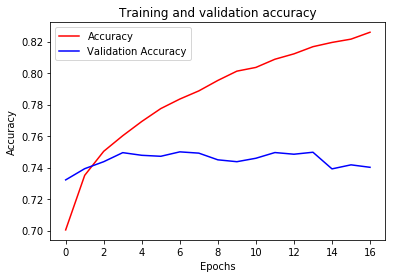

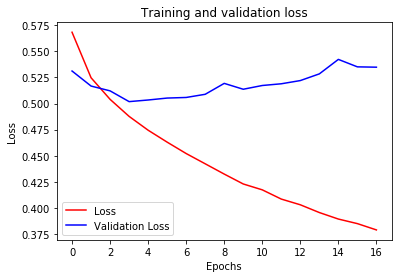

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!